# Binomial Distribution

The repetition of multiple independent Bernoulli trials is called a Bernoulli process.

The outcomes of a Bernoulli process will follow a Binomial distribution. As such, the Bernoulli distribution would be a Binomial distribution with a single trial.

The Binomial distribution summarizes the number of successes k in a given number of Bernoulli trials n, with a given probability of success for each trial p.

A distribution where only two outcomes are possible, such as success or failure, gain or loss, win or lose and where the probability of success and failure is the same for all the trials is called a Binomial Distribution. However, The outcomes need not be equally likely, and each trial is independent of each other.

The parameters of a binomial distribution are n and p where n is the total number of trials, and p is the probability of success in each trial.

You can play around with it in the plot below

In [1]:
from ipywidgets import interact, interactive
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt

In [2]:
####################################################################################################
# Making the widgets
prob_success = widgets.FloatSlider(
    value=0.5,
    min=0,
    max=1,
    step=0.1,
    description='Probability of success:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
    style={'description_width': 'initial'}

)

num_trials = widgets.IntSlider(
    value=500,
    min=1,
    max=1000,
    step=1,
    description='Number of Trials:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    style={'description_width': 'initial'}
)

num_success = widgets.IntSlider(
    value=10,
    min=1,
    max=1000,
    step=1,
    description='Number of Successes:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    style={'description_width': 'initial'}
)

####################################################################################################

def create_binomial(prob_success,num_trials,num_success):
    sampl = np.random.binomial(num_trials,prob_success,num_success)
    plt.hist(sampl,bins=20) 
    plt.title("histogram") 
    plt.show()
####################################################################################################

In [3]:
interactive_plot = interactive(create_binomial,prob_success=prob_success,num_trials=num_trials,num_success=num_success )
interactive_plot

interactive(children=(FloatSlider(value=0.5, continuous_update=False, description='Probability of success:', m…

# Question
Given a dataset collected from the IPL, 'deliveries.csv' which gives us ball by ball data. 

- Calculate the binomial distribution of getting 2 wickets in the next over if 'Harbhajan Singh' is bowling.
- Calculate the binomial distribution of getting 1 six in the next over if Virat Kohli or 'V Kohli' is batting.
- Calculate the binomial distribution of the batting team scoring 10 runs of more in the last over.
- Calculate the binomial distribution for the next game going over 18 overs.

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('dataset/deliveries.csv')

In [6]:
df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [7]:
df.shape

(179078, 21)

In [8]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

## Question 1
Calculate the binomial distribution of getting 2 wickets in the next over if 'Harbhajan Singh' is bowling.

In [9]:
# Getting the balls bowled by Harbhajan Singh 
df[df['bowler'] == 'Harbhajan Singh']

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
1478,7,1,Kolkata Knight Riders,Mumbai Indians,9,1,MK Pandey,YK Pathan,Harbhajan Singh,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1479,7,1,Kolkata Knight Riders,Mumbai Indians,9,2,MK Pandey,YK Pathan,Harbhajan Singh,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
1480,7,1,Kolkata Knight Riders,Mumbai Indians,9,3,YK Pathan,MK Pandey,Harbhajan Singh,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1481,7,1,Kolkata Knight Riders,Mumbai Indians,9,4,YK Pathan,MK Pandey,Harbhajan Singh,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
1482,7,1,Kolkata Knight Riders,Mumbai Indians,9,5,YK Pathan,MK Pandey,Harbhajan Singh,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178895,11415,1,Mumbai Indians,Chennai Super Kings,11,2,Ishan Kishan,AS Yadav,Harbhajan Singh,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
178896,11415,1,Mumbai Indians,Chennai Super Kings,11,3,AS Yadav,Ishan Kishan,Harbhajan Singh,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
178897,11415,1,Mumbai Indians,Chennai Super Kings,11,4,AS Yadav,Ishan Kishan,Harbhajan Singh,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178898,11415,1,Mumbai Indians,Chennai Super Kings,11,5,AS Yadav,Ishan Kishan,Harbhajan Singh,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [10]:
df[df['bowler'] == 'Harbhajan Singh']['player_dismissed']

1478      NaN
1479      NaN
1480      NaN
1481      NaN
1482      NaN
         ... 
178895    NaN
178896    NaN
178897    NaN
178898    NaN
178899    NaN
Name: player_dismissed, Length: 3451, dtype: object

In [11]:
# Getting all the rows where he took a wicket
df[df['bowler'] == 'Harbhajan Singh']['player_dismissed'].isna()

1478      True
1479      True
1480      True
1481      True
1482      True
          ... 
178895    True
178896    True
178897    True
178898    True
178899    True
Name: player_dismissed, Length: 3451, dtype: bool

In [12]:
# Adding them up
df[df['bowler'] == 'Harbhajan Singh']['player_dismissed'].isna().sum()

3290

In [13]:
# Figuring out how many balls he bowled
df[df['bowler'] == 'Harbhajan Singh'].shape

(3451, 21)

So he bowled 3451 balls, out of which 3290 were without wickets.

In [14]:
# Total wickets 
total_wickets = 3451-3290
total_wickets

161

So 161 wickets out of 3451 balls

In [15]:
# Figuring out the wicket rate
success_rate = 161/3451
success_rate

0.04665314401622718

### So, now that we have a wicket rate, we need to find out the probabiltiy of him getting 2 wickets in the next 6 balls

In [16]:
# We can use scipy.stats to calculate this
from scipy.stats import binom

And we can calculate binomial probability by ```binom.pmf```, where ```p``` is the probability, ```n``` is the number of attempts, and ```k``` is the number of successes.

So for our example, we have

In [17]:
binom.pmf(k=2, n=6, p=0.04665314401622718)

0.02696850345872654

We have a 2 % probability of this event happening, visualising the same through simulation.

/tmp/ipykernel_905/1349587494.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(random.binomial(n=6, p=0.04665314401622718, size=200), hist=True, kde=False)


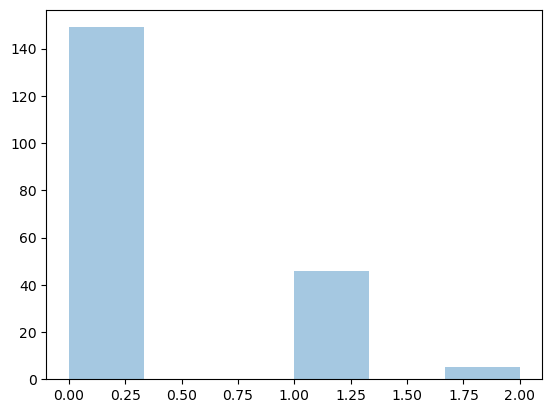

In [18]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(random.binomial(n=6, p=0.04665314401622718, size=200), hist=True, kde=False)

plt.show()

With this we can confirm that most likely he will not take a wicket, might take 1, and the probability of taking 2 is very low at 2 %

-----

## Question 2
Calculate the binomial distribution of getting 1 six in the next over if Virat Kohli or 'V Kohli' is batting.

In [19]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [20]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [21]:
# Filtering out the rows where kohli is the batsman
df_kohli = df[df['batsman'] == 'V Kohli']

In [22]:
# Finding out the rows where he hit six'es
df_kohli_six = df_kohli[df_kohli['batsman_runs'] == 6]

In [23]:
# You can now have a look at the column 'total'
df_kohli_six

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2603,12,1,Royal Challengers Bangalore,Mumbai Indians,3,1,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
2673,12,1,Royal Challengers Bangalore,Mumbai Indians,14,5,V Kohli,AB de Villiers,JJ Bumrah,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
3945,17,2,Royal Challengers Bangalore,Rising Pune Supergiant,1,3,V Kohli,Mandeep Singh,JD Unadkat,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
4651,20,1,Royal Challengers Bangalore,Gujarat Lions,15,5,V Kohli,TM Head,S Kaushik,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
6931,30,1,Royal Challengers Bangalore,Gujarat Lions,2,5,V Kohli,CH Gayle,Basil Thampi,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175812,11337,2,Royal Challengers Bangalore,Delhi Capitals,5,3,V Kohli,PA Patel,I Sharma,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
176412,11340,1,Royal Challengers Bangalore,Rajasthan Royals,1,1,V Kohli,AB de Villiers,VR Aaron,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
176413,11340,1,Royal Challengers Bangalore,Rajasthan Royals,1,2,V Kohli,AB de Villiers,VR Aaron,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
176418,11340,1,Royal Challengers Bangalore,Rajasthan Royals,2,1,V Kohli,AB de Villiers,S Gopal,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN


In [24]:
# Calculating six shape 
df_kohli_six.shape

(191, 21)

In [25]:
# Calculating shape for all balls played by kohli
df_kohli.shape

(4211, 21)

In [26]:
sixes_success_rate = 191/4211
sixes_success_rate

0.04535739729280456

So out of 4211 balls, kohli hit sixes on 191 balls, giving us a six success rate of about 4%. Now, let's calculate the probability of him scoring a six in the next 6 balls.

In [27]:
from scipy.stats import binom

#calculate binomial probability
binom.pmf(k=1, n=6, p=0.04535739729280456)

0.21577614733156159

So, out of the next 6 balls, the probability of kohli hitting 1 six is 21 %, very impressive if you ask me. Let's visualize the same.

/tmp/ipykernel_905/3448941849.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(random.binomial(n=6, p=0.04535739729280456, size=500), hist=True, kde=False)


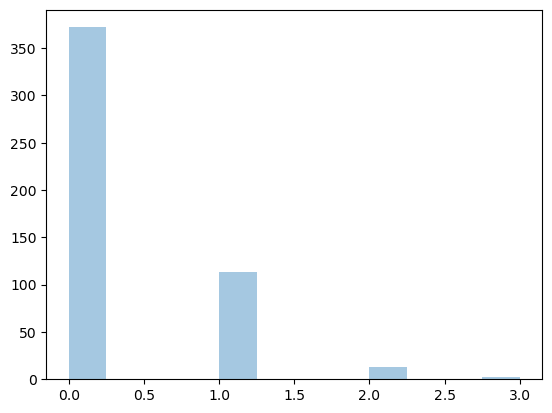

In [28]:
sns.distplot(random.binomial(n=6, p=0.04535739729280456, size=500), hist=True, kde=False)

plt.show()

## Question 3
Calculate the binomial distribution of the batting team scoring 10 runs of more in the last over.

In [29]:
# First, we will need to figure out how manny times has the batting team scores more than 10 runs in the last over.
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [30]:
# Getting the data for last overs
df_last_over = df[df['over'] == 20]
df_last_over

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
119,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,1,BCJ Cutting,DJ Hooda,SR Watson,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
120,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,2,DJ Hooda,BCJ Cutting,SR Watson,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
121,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,3,BCJ Cutting,DJ Hooda,SR Watson,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
122,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,4,BCJ Cutting,DJ Hooda,SR Watson,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
123,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,5,BCJ Cutting,DJ Hooda,SR Watson,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [31]:
# Let's look at how many matches have been played in our dataset
df['match_id'].nunique()

756

In [32]:
# Now, let's look at the total number of matches where the game went all the way (20 overs)
df_last_over['match_id'].nunique()

716

<AxesSubplot:ylabel='Frequency'>

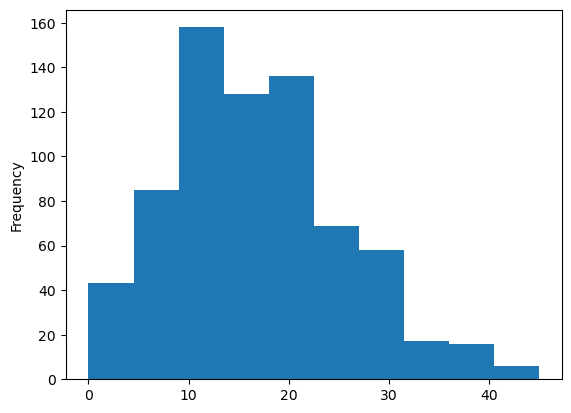

In [33]:
# Now to figure out what was the total score for each match in the last over
df_last_over.groupby('match_id')['total_runs'].sum().plot(kind='hist')

In [34]:
# Converting to dataframe
df_last_over_runs = df_last_over.groupby('match_id')['total_runs'].sum()

In [35]:
df_last_over_runs

match_id
1        23
2        45
3        14
4        16
5        10
         ..
11347     3
11412    10
11413    21
11414    16
11415    16
Name: total_runs, Length: 716, dtype: int64

So now that we know for the matches that did go all the way, how many runs were scored in the last over, we can find out for how many of them, more than 10 runs were scored. 

In [36]:
df_last_over_runs.shape

(716,)

In [37]:
df_last_over_runs[df_last_over_runs > 10]

match_id
1        23
2        45
3        14
4        16
7        35
         ..
11344    16
11345    37
11413    21
11414    16
11415    16
Name: total_runs, Length: 534, dtype: int64

In [38]:
df_last_over_runs[df_last_over_runs > 10].shape

(534,)

In [39]:
proba_of_more_10 = (534 / 716)
proba_of_more_10

0.7458100558659218

So the probability of scoring more than 10 runs in the last over is about 74%. Now let's calculate binomial distribution for the same.

In [40]:
from scipy.stats import binom

#calculate binomial probability
binom.pmf(k=1, n=1, p=0.7458100558659218)

0.7458100558659218

Interesting ??

# Question 4
Calculate the binomial distribution for the next game going over 18 overs.

In [41]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


First, we need to filter out the matches where the overs went above 15, for this i will filter if the match id has a over '15', if it does not, than we can assume that the match ended before that.

In [42]:
df_over_18 = df[df['over'] > 18]

In [43]:
df_over_18

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
113,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,19,1,DJ Hooda,Yuvraj Singh,TS Mills,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
114,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,19,2,Yuvraj Singh,DJ Hooda,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
115,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,19,3,Yuvraj Singh,DJ Hooda,TS Mills,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
116,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,19,4,Yuvraj Singh,DJ Hooda,TS Mills,0,...,0,0,0,0,0,0,0,Yuvraj Singh,bowled,NaN
117,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,19,5,BCJ Cutting,DJ Hooda,TS Mills,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


Now, i can count all the unique match id's 

In [44]:
df_over_18['match_id'].nunique()

727

So 744 matches went above 15 overs, let's see how many unique matches are there in the orignal dataset

In [45]:
df['match_id'].nunique()

756

So out of 756 matches played, 727 matches did go till the 18th over, which gives us a success rate of 

In [46]:
df_over_18_proba = (727 / 756)
df_over_18_proba

0.9616402116402116

3 % chance of the match not making it to the 18th over, 97% chance of it doing so.

In [47]:
from scipy.stats import binom

#calculate binomial probability
binom.pmf(k=1, n=1, p=0.9616402116402116)

0.9616402116402116

Hmmm, what can be done ?

# Poisson Distribution

## Poisson Process
A Poisson Process is a model for a series of discrete event where the average time between events is known, but the exact timing of events is random. The arrival of an event is independent of the event before (waiting time between events is memoryless). For example, suppose we own a website which our content delivery network (CDN) tells us goes down on average once per 60 days, but one failure doesn’t affect the probability of the next. All we know is the average time between failures. This is a Poisson process that looks like:

![poisson](https://miro.medium.com/max/720/1*YzGP8RRR9gYa6f8pJGIgMg.png)

The important point is we know the average time between events but they are randomly spaced (stochastic). We might have back-to-back failures, but we could also go years between failures due to the randomness of the process.

## Poisson Distribution
The Poisson Process is the model we use for describing randomly occurring events and by itself, isn’t that useful. We need the Poisson Distribution to do interesting things like finding the probability of a number of events in a time period or finding the probability of waiting some time until the next event.

The Poisson Distribution probability mass function gives the probability of observing k events in a time period given the length of the period and the average events per time:

In [48]:
def create_poisson(x,y):
    sampl = np.random.poisson(lam=x, size=int(y))
#     sampl = np.random.exponential(scale=x, size=int(y))
    plt.hist(sampl,bins=30) 
    plt.title("histogram") 
    plt.show()
    
    
x = widgets.FloatLogSlider(
    value=10,
    min=0,
    max=6,
    base=10,
    description='lam',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    style={'description_width': 'initial'}
)

size = widgets.FloatLogSlider(
    value=10,
    min=0,
    max=6,
    base=10,
    description='size',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    style={'description_width': 'initial'}
)



In [49]:
interactive_plot = interactive(create_poisson,x=x,y=size)
interactive_plot

interactive(children=(FloatLogSlider(value=10.0, continuous_update=False, description='lam', max=6.0, readout_…

# Question
You want to see some shooting start on the north pole glaciers and you have been informed that on average you can see 5 of them for every 60 mins. Given your knowledge of Poisson distributions. 
- What is the probability of seeing 9 stars in a hour.
- The probability of seeing number of stars given the rate of 5 every 1 hour.
- What is the probability of seeing 4 stars or less in a hour.
- What if we change the rate to 10 stars an hour, what will now be the probability of seeing 8 stars in an hour.
- What if we change the success rate, how will that affect our curve 

In [50]:
from scipy.special import factorial

def calc_prob(events_per_minute, minutes, k):
    # Calculate probability of k events in specified number of minutes
    lam = events_per_minute * minutes
    return np.exp(-lam) * np.power(lam, k) / factorial(k)

## Question 1
the probability of seeing 9 stars in a hour

In [51]:
# Using the function that we just defined above, we can figure this out
calc_prob((5/60),60,9)

0.03626557741564375

So, there is about a 3% chance that we see 9 stars in an hour

## Question 2
The probability of seeing number of stars given the rate of 5 every 1 hour

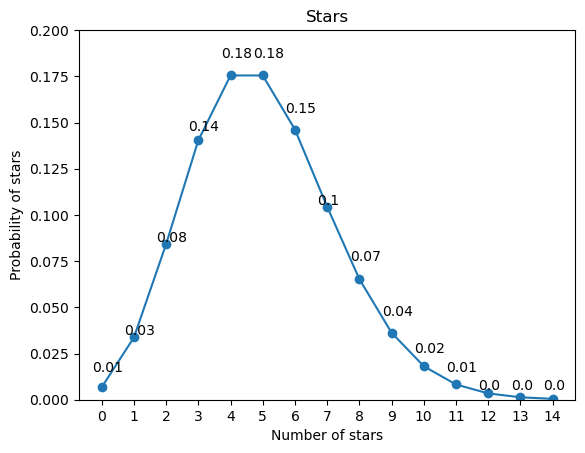

In [52]:
import matplotlib.pyplot as plt

prob_of_star = [calc_prob((5/60),60,i) for i in range(15)]
range_of_stars = [i for i in range(15)]


fig = plt.figure()
ax = fig.add_subplot(111)


plt.plot(range(len(range_of_stars)),prob_of_star,marker='o') # Plotting data
plt.xticks(range(len(range_of_stars)), range_of_stars) # Redefining x-axis labels

plt.title('Stars')
plt.xlabel('Number of stars')
plt.ylabel('Probability of stars')


prob_of_star_round = [round(i,ndigits=2) for i in prob_of_star]

for i, v in enumerate(prob_of_star_round):
    ax.annotate(str(v), xy=(i,v), xytext=(-7,7), textcoords='offset points')

plt.ylim(0,0.2)
plt.show()

## Question 3
What is the probability of seeing 4 stars or less in a hour

In [53]:
# You can add up the probabilities
np.array(prob_of_star[:4]).sum()

0.2650259152973617

We can add up all the probabilities of seeing 4 or less and add them up together.

## Question 4
What if we change the rate to 10 stars an hour, what will now be the probability of seeing 8 stars in an hour.

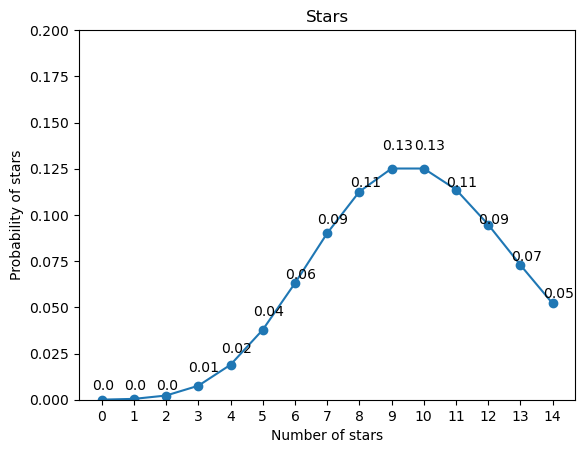

In [54]:
import matplotlib.pyplot as plt

prob_of_star = [calc_prob((10/60),60,i) for i in range(15)]
range_of_stars = [i for i in range(15)]


fig = plt.figure()
ax = fig.add_subplot(111)


plt.plot(range(len(range_of_stars)),prob_of_star,marker='o') # Plotting data
plt.xticks(range(len(range_of_stars)), range_of_stars) # Redefining x-axis labels

plt.title('Stars')
plt.xlabel('Number of stars')
plt.ylabel('Probability of stars')


prob_of_star_round = [round(i,ndigits=2) for i in prob_of_star]

for i, v in enumerate(prob_of_star_round):
    ax.annotate(str(v), xy=(i,v), xytext=(-7,7), textcoords='offset points')

plt.ylim(0,0.2)
plt.show()

The probability of seeing 8 stars in an hour now is about 11%

## What if we change the success rate, how will that affect our curve 

In [55]:
import matplotlib.pyplot as plt

# prob_of_star = [calc_prob((2/60),60,i) for i in range(15)]


prob_of_star2 = [calc_prob((4/60),60,i) for i in range(15)]
prob_of_star4 = [calc_prob((8/60),60,i) for i in range(15)]
prob_of_star6 = [calc_prob((12/60),60,i) for i in range(15)]
prob_of_star8 = [calc_prob((16/60),60,i) for i in range(15)]

range_of_stars = [i for i in range(15)]


prob_of_star = [prob_of_star2, prob_of_star4, prob_of_star6, prob_of_star8]

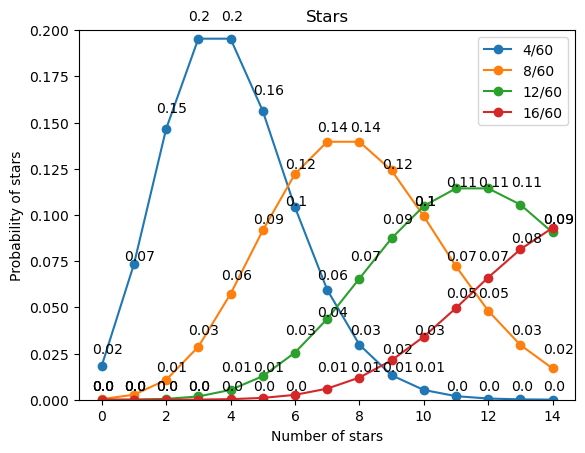

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111)

labels_x = ['4/60','8/60','12/60','16/60']

for k,i in enumerate(prob_of_star):
    plt.plot(range(len(range_of_stars)),i,marker='o',label=labels_x[k]) # Plotting data
#     plt.xticks(range(len(range_of_stars)), range_of_stars) # Redefining x-axis labels

    
plt.title('Stars')
plt.xlabel('Number of stars')
plt.ylabel('Probability of stars')

for j in prob_of_star:
    prob_of_star_round = [round(i,ndigits=2) for i in j]

    for i, v in enumerate(prob_of_star_round):
        ax.annotate(str(v), xy=(i,v), xytext=(-7,7), textcoords='offset points')

plt.ylim(0,0.2)
plt.legend(loc="upper right")
plt.show()